In [2]:
import numpy as np
from os import listdir
from os import path
import json
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle

In [3]:
from learn import *
import utils

Task number: 298
Number of train examples 2
0
     input shapes [(6, 6), (6, 6)]
     output shapes [(6, 6), (6, 6)]


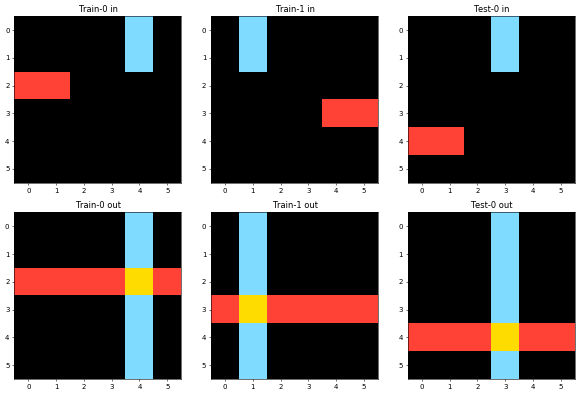

In [4]:
tr, te, ev = utils.get_data()
t = Task(298, tr[298])
t.summary()
t.plot()

In [50]:
IM = t.train[0].input
OM = t.train[0].output

In [52]:
OM.m

array([[0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0],
       [2, 2, 2, 2, 4, 2],
       [0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0]], dtype=object)

(6, 6)

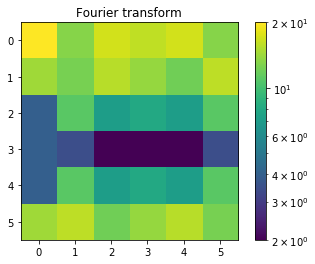

In [73]:
from scipy import fftpack
im_fft1 = fftpack.fft2(IM.m)
im_fft2 = fftpack.fft2(OM.m)
# im_fft
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=2))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')
im_fft.shape

Text(0.5, 1.0, 'Filtered Spectrum')

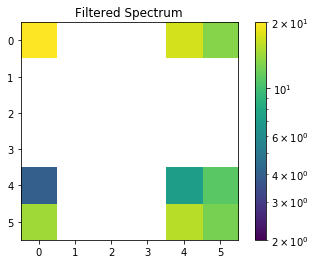

In [74]:
keep_fraction = 0.2

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

In [49]:
from feature_calc import FeatureCalculator
from itertools import product
from datetime import datetime
features = []

xsh, ysh = np.shape(IM)

b1 = datetime.now()
for y, x in product(range(ysh), range(xsh)):
    c = IM[y][x]
    fc = FeatureCalculator(c.y, c.x, c.v, IM)
    features.append(fc.features().T)
#     print(y,x)
#     features[y,x] = fc.features()
b2 = datetime.now()
diff = (b1 - b2)
print('took',diff.microseconds / 1000, 'miliseconds')
f = np.array(features)
f = np.reshape(f, (ysh, xsh, *f.shape[1:]))
IM.f = f
f.shape

took 992.988 miliseconds


(6, 6, 6, 6, 11)

In [9]:
f[2,0,:]

array([[[-2, 0, 1, 0, False, True, False, 0, -2, 2, 2],
        [-1, 0, 0, 0, False, True, False, 0, -2, 2, 2],
        [0, 0, 0, 0, True, False, False, 4, 0, 0, 4],
        [1, 0, 1, 0, False, True, False, 0, -2, 2, 2],
        [2, 0, 2, 0, False, True, False, 0, -2, 2, 2],
        [3, 0, 2, 0, False, True, False, 0, -2, 2, 2]],

       [[-2, 1, 1, 1, False, True, False, 0, -2, 2, 2],
        [-1, 1, 0, 1, False, True, False, 0, -2, 2, 2],
        [0, 1, 0, 1, True, False, False, 4, 0, 0, 4],
        [1, 1, 1, 1, False, True, False, 0, -2, 2, 2],
        [2, 1, 2, 1, False, True, False, 0, -2, 2, 2],
        [3, 1, 2, 1, False, True, False, 0, -2, 2, 2]],

       [[-2, 2, 1, 2, False, True, False, 0, -2, 2, 2],
        [-1, 2, 0, 2, False, True, False, 0, -2, 2, 2],
        [0, 2, 0, 2, False, True, False, 0, -2, 2, 2],
        [1, 2, 1, 2, False, True, False, 0, -2, 2, 2],
        [2, 2, 2, 2, False, True, False, 0, -2, 2, 2],
        [3, 2, 2, 2, False, True, False, 0, -2, 2, 2]],



In [10]:
IM.m > 0

array([[False, False, False, False,  True, False],
       [False, False, False, False,  True, False],
       [ True,  True, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [11]:
active = f[IM.m > 0]
active.shape

(4, 6, 6, 11)

In [12]:
c1, c2 = active[0, :], active[2,:]
active[0]

array([[[0, -4, 0, 2, False, True, False, 0, -8, 8, 8],
        [1, -4, 1, 2, False, True, False, 0, -8, 8, 8],
        [2, -4, 2, 2, False, True, False, 16, -6, 6, 10],
        [3, -4, 2, 2, False, True, False, 0, -8, 8, 8],
        [4, -4, 1, 2, False, True, False, 0, -8, 8, 8],
        [5, -4, 0, 2, False, True, False, 0, -8, 8, 8]],

       [[0, -3, 0, 3, False, True, False, 0, -8, 8, 8],
        [1, -3, 1, 3, False, True, False, 0, -8, 8, 8],
        [2, -3, 2, 3, False, True, False, 16, -6, 6, 10],
        [3, -3, 2, 3, False, True, False, 0, -8, 8, 8],
        [4, -3, 1, 3, False, True, False, 0, -8, 8, 8],
        [5, -3, 0, 3, False, True, False, 0, -8, 8, 8]],

       [[0, -2, 0, 4, False, True, False, 0, -8, 8, 8],
        [1, -2, 1, 4, False, True, False, 0, -8, 8, 8],
        [2, -2, 2, 4, False, True, False, 0, -8, 8, 8],
        [3, -2, 2, 4, False, True, False, 0, -8, 8, 8],
        [4, -2, 1, 4, False, True, False, 0, -8, 8, 8],
        [5, -2, 0, 4, False, True, False

In [13]:
# c1.y, c1.x, c1.v, c1.shape
# c1 is (0, 4) c2 is(0 , 2)1
# t == True

# np.where(c1[0,:])

In [14]:
# print(np.dstack(np.nonzero(c1 == c2)))
feat = np.reshape(c1, (-1, c1.shape[-1])).T

In [15]:
from collections import Counter

In [16]:
counts = []
for i in range(feat.shape[0]):
    counts.append(Counter(feat[i]))

In [17]:
counts

[Counter({0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6}),
 Counter({-4: 6, -3: 6, -2: 6, -1: 6, 0: 6, 1: 6}),
 Counter({0: 12, 1: 12, 2: 12}),
 Counter({2: 6, 3: 6, 4: 6, 5: 6, 0: 6, 1: 6}),
 Counter({False: 34, True: 2}),
 Counter({True: 34, False: 2}),
 Counter({False: 36}),
 Counter({0: 32, 16: 2, 64: 2}),
 Counter({-8: 32, -6: 2, 0: 2}),
 Counter({8: 32, 6: 2, 0: 2}),
 Counter({8: 32, 10: 2, 16: 2})]

In [18]:
f = active
flattened = f.reshape((-1, f.shape[-1]))
flattened.shape

(144, 11)

In [19]:
from collections import Sequence

def recursive_map (seq, func):
    for item in seq:
        if isinstance(item, Sequence):
            yield type(item)(recursive_map(item, func))
        else:
            yield func(item)

/home/daniel/.local/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


In [20]:
temp = map(list, flattened)
s = recursive_map(list(temp), str)
sr = list(map(str, range(flattened.shape[1])))
# list(map(lambda a: '--'.join(*tuple(zip(a, sr))), s))
# list(s)
x = map(lambda a: tuple(zip(a, sr)), s)
tupled = list(x)
tupled

[(('0', '0'),
  ('-4', '1'),
  ('0', '2'),
  ('2', '3'),
  ('False', '4'),
  ('True', '5'),
  ('False', '6'),
  ('0', '7'),
  ('-8', '8'),
  ('8', '9'),
  ('8', '10')),
 (('1', '0'),
  ('-4', '1'),
  ('1', '2'),
  ('2', '3'),
  ('False', '4'),
  ('True', '5'),
  ('False', '6'),
  ('0', '7'),
  ('-8', '8'),
  ('8', '9'),
  ('8', '10')),
 (('2', '0'),
  ('-4', '1'),
  ('2', '2'),
  ('2', '3'),
  ('False', '4'),
  ('True', '5'),
  ('False', '6'),
  ('16', '7'),
  ('-6', '8'),
  ('6', '9'),
  ('10', '10')),
 (('3', '0'),
  ('-4', '1'),
  ('2', '2'),
  ('2', '3'),
  ('False', '4'),
  ('True', '5'),
  ('False', '6'),
  ('0', '7'),
  ('-8', '8'),
  ('8', '9'),
  ('8', '10')),
 (('4', '0'),
  ('-4', '1'),
  ('1', '2'),
  ('2', '3'),
  ('False', '4'),
  ('True', '5'),
  ('False', '6'),
  ('0', '7'),
  ('-8', '8'),
  ('8', '9'),
  ('8', '10')),
 (('5', '0'),
  ('-4', '1'),
  ('0', '2'),
  ('2', '3'),
  ('False', '4'),
  ('True', '5'),
  ('False', '6'),
  ('0', '7'),
  ('-8', '8'),
  ('8', '9'),


In [21]:
# f1 = lambda elem: str(elem) + 
# f = lambda l: str(l) 
# temp = map()
# flattened = list()
# np.shape(flattened)

In [22]:
from efficient_apriori import apriori

In [23]:
itemsets, rules = apriori(tupled, min_support=0.01,  min_confidence=1, verbosity=2)

Generating itemsets.
 Counting itemsets of length 1.
  Found 51 candidate itemsets of length 1.
  Found 51 large itemsets of length 1.
    [(('8', '9'),), (('True', '5'),), (('0', '0'),), (('-4', '1'),), (('False', '4'),), (('0', '2'),), (('0', '7'),), (('-8', '8'),), (('2', '3'),), (('False', '6'),), (('8', '10'),), (('1', '0'),), (('1', '2'),), (('16', '7'),), (('10', '10'),), (('2', '2'),), (('-6', '8'),), (('2', '0'),), (('6', '9'),), (('3', '0'),), (('4', '0'),), (('5', '0'),), (('-3', '1'),), (('3', '3'),), (('4', '3'),), (('-2', '1'),), (('5', '3'),), (('-1', '1'),), (('True', '4'),), (('False', '5'),), (('0', '8'),), (('0', '9'),), (('64', '7'),), (('16', '10'),), (('0', '3'),), (('0', '1'),), (('1', '3'),), (('1', '1'),), (('-1', '0'),), (('2', '10'),), (('-2', '0'),), (('-2', '8'),), (('2', '9'),), (('4', '10'),), (('4', '7'),), (('2', '1'),), (('3', '1'),), (('4', '1'),), (('6', '8'),), (('True', '6'),), (('5', '1'),)]
 Counting itemsets of length 2.
  Found 1275 candidate i

  Found 8012 large itemsets of length 4.
   [(('-1', '0'), ('-1', '1'), ('0', '2'), ('0', '7')), (('-1', '0'), ('-1', '1'), ('0', '2'), ('5', '3')), (('-1', '0'), ('-1', '1'), ('0', '2'), ('False', '4')), (('-1', '0'), ('-1', '1'), ('0', '2'), ('False', '6')), (('-1', '0'), ('-1', '1'), ('0', '2'), ('True', '5')), (('-1', '0'), ('-1', '1'), ('0', '7'), ('5', '3')), (('-1', '0'), ('-1', '1'), ('0', '7'), ('False', '4')), (('-1', '0'), ('-1', '1'), ('0', '7'), ('False', '6')), (('-1', '0'), ('-1', '1'), ('0', '7'), ('True', '5')), (('-1', '0'), ('-1', '1'), ('5', '3'), ('False', '4')), (('-1', '0'), ('-1', '1'), ('5', '3'), ('False', '6')), (('-1', '0'), ('-1', '1'), ('5', '3'), ('True', '5')), (('-1', '0'), ('-1', '1'), ('False', '4'), ('False', '6')), (('-1', '0'), ('-1', '1'), ('False', '4'), ('True', '5')), (('-1', '0'), ('-1', '1'), ('False', '6'), ('True', '5')), (('-1', '0'), ('-2', '8'), ('0', '1'), ('0', '2')), (('-1', '0'), ('-2', '8'), ('0', '1'), ('0', '3')), (('-1', '0'), ('

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Generating rules of size 5.
 Generating rules of size 6.
 Generating rules of size 7.
 Generating rules of size 8.
Rule generation terminated.



In [24]:
len(rules)

1387442

In [25]:
len(itemsets)
itemsets[8]

{(('-1', '0'),
  ('-1', '1'),
  ('0', '2'),
  ('0', '7'),
  ('5', '3'),
  ('False', '4'),
  ('False', '6'),
  ('True', '5')): 2,
 (('-1', '0'),
  ('-2', '8'),
  ('0', '1'),
  ('0', '2'),
  ('0', '3'),
  ('0', '7'),
  ('2', '10'),
  ('2', '9')): 2,
 (('-1', '0'),
  ('-2', '8'),
  ('0', '1'),
  ('0', '2'),
  ('0', '3'),
  ('0', '7'),
  ('2', '10'),
  ('False', '4')): 2,
 (('-1', '0'),
  ('-2', '8'),
  ('0', '1'),
  ('0', '2'),
  ('0', '3'),
  ('0', '7'),
  ('2', '10'),
  ('False', '6')): 2,
 (('-1', '0'),
  ('-2', '8'),
  ('0', '1'),
  ('0', '2'),
  ('0', '3'),
  ('0', '7'),
  ('2', '10'),
  ('True', '5')): 2,
 (('-1', '0'),
  ('-2', '8'),
  ('0', '1'),
  ('0', '2'),
  ('0', '3'),
  ('0', '7'),
  ('2', '9'),
  ('False', '4')): 2,
 (('-1', '0'),
  ('-2', '8'),
  ('0', '1'),
  ('0', '2'),
  ('0', '3'),
  ('0', '7'),
  ('2', '9'),
  ('False', '6')): 2,
 (('-1', '0'),
  ('-2', '8'),
  ('0', '1'),
  ('0', '2'),
  ('0', '3'),
  ('0', '7'),
  ('2', '9'),
  ('True', '5')): 2,
 (('-1', '0'),
  ('

In [26]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)

In [27]:
print(rules[1])

{('-1', '1')} -> {('5', '3')} (conf: 1.000, supp: 0.125, lift: 6.000, conv: 833333333.333)


In [28]:
diffs = [ex.input.m - ex.output.m for ex in t.train]
np.shape(diffs)
et1 = diffs[0]
inpt1, outt1 = t.train[0].input, t.train[0].output

In [29]:
args = np.argwhere(et1 != 0)
args

array([[2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [3, 4],
       [4, 4],
       [5, 4]])

In [30]:
inpt1.m

array([[0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0],
       [2, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=object)

In [33]:
# F = [
#     (FeatureCalculator(*p, inpt1[p], inpt1), FeatureCalculator(*p, outt1[p], outt1))
#     for p in args
# ]
# F[5][0].features()

m1 = inpt1.m
m2 = outt1.m

In [45]:
from sklearn.decomposition import MiniBatchDictionaryLearning

d = MiniBatchDictionaryLearning().fit(m1, y=m2)

In [46]:
d

MiniBatchDictionaryLearning(alpha=1, batch_size=3, dict_init=None,
              fit_algorithm='lars', n_components=None, n_iter=1000,
              n_jobs=None, positive_code=False, positive_dict=False,
              random_state=None, shuffle=True, split_sign=False,
              transform_algorithm='omp', transform_alpha=None,
              transform_n_nonzero_coefs=None, verbose=False)

In [48]:
d.transform(t.test[0].input)

/home/daniel/.local/lib/python3.7/site-packages/sklearn/decomposition/dict_learning.py:173: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -5.0938207 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -5.0938207 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  2.82842712,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])